## Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

https://www.kaggle.com/code/anirbansarkar823/telecom-customer-churn-prediction

https://javilopezcastillo.medium.com/telecom-churn-analysis-using-clustering-techniques-for-customer-segmentation-4cdb7318f672

https://github.com/jlopez873?tab=repositories

## Import Data

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Check the Duplicate

In [4]:
print(df.duplicated().value_counts())

False    7043
dtype: int64


## Check the missing Values

In [5]:
df.isnull().values.any()

False

## Descriptive Overview

In [6]:
round(df.describe(include='all'),2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.00,7043,7043,7043.00,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.00,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.16,NaN,NaN,32.37,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.76,NaN,NaN
std,NaN,NaN,0.37,NaN,NaN,24.56,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.09,NaN,NaN
min,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.25,NaN,NaN
25%,NaN,NaN,0.00,NaN,NaN,9.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.50,NaN,NaN
50%,NaN,NaN,0.00,NaN,NaN,29.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.35,NaN,NaN
75%,NaN,NaN,0.00,NaN,NaN,55.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.85,NaN,NaN


In [7]:
df.groupby('Churn').mean()

,SeniorCitizen,tenure,MonthlyCharges
Churn,,,
No,0.128721,37.569965,61.265124
Yes,0.254682,17.979133,74.441332


## Target Value Modification

In [8]:
# Count the oocurance of unique values in the 'Churn' Column

churn_counts =  df.Churn.value_counts(normalize=True)
churn_counts

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [9]:
# Calculate the percentage of 'Yes' and 'No' label

total_count = churn_counts.sum()

percentage_yes = (churn_counts['Yes']/ total_count) * 100
percentage_no = (churn_counts['No']/ total_count) *100

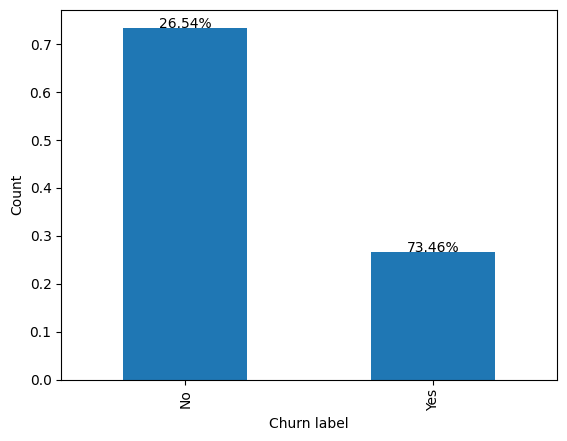

In [10]:
# Plot the target value
ax = churn_counts.plot(kind='bar')

# Annotate the bars with percentages
for i, count in enumerate(churn_counts):
    percentage = percentage_yes if i == 0 else percentage_no
    ax.annotate(f'{percentage:.2f}%', xy=(i, count), ha='center')
    
    
plt.xlabel("Churn label")
plt.ylabel("Count")
plt.show()

**Obsevation**

- The dataset exhibits a significant class imbalance, with a larger amount of data representing non-churners. 

#### 1. How does the length of a customer's tenure with the company influence their likelihood of churning?

- Tenure : How many months a person has been a client of company?

In [11]:
grouped_data = df.groupby(['tenure', 'Churn']).size().reset_index(name='count')
grouped_data.head()

,tenure,Churn,count
0,0,No,11
1,1,No,233
2,1,Yes,380
3,2,No,115
4,2,Yes,123


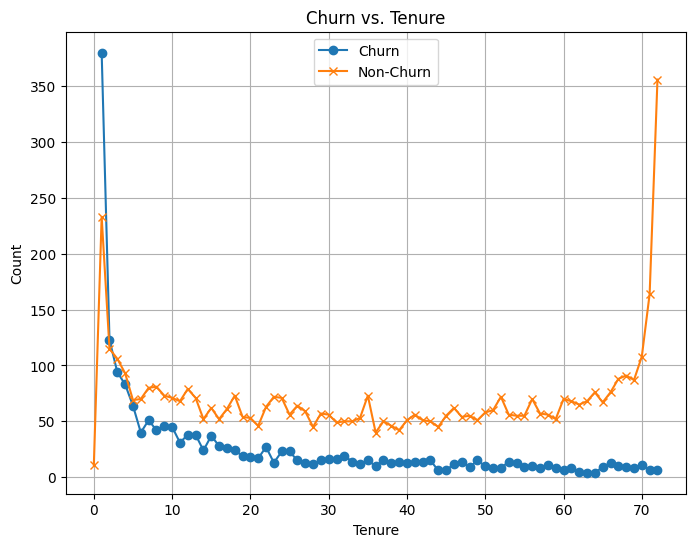

In [12]:
# Separate churn and non-churn counts
churn_data = grouped_data[grouped_data['Churn'] == 'Yes']
non_churn_data = grouped_data[grouped_data['Churn'] == 'No']

# Create a line chart for churn and non-churn counts
plt.figure(figsize=(8, 6))
plt.plot(churn_data['tenure'], churn_data['count'], label='Churn', marker='o')
plt.plot(non_churn_data['tenure'], non_churn_data['count'], label='Non-Churn', marker='x')

plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Churn vs. Tenure')
plt.legend()
plt.grid(True)
plt.show()

**Observation:**

- Customers with the low tenure **"0-10"** has the highest rate of churning,these range can be crucial for business decisions.



- Since, in general the **Non-Churn** line has small fluctuation and remains **relatively stable**, with longer tenure tend to stay with the company.



- The Churn line decreases or remains relatively stable as tenure increases, it suggests that **customer loyalty** increases with longer tenure.

#### 2. Is there a correlation between churn and factors such as monthly charges and total charges?

In [14]:
df[['MonthlyCharges','TotalCharges']]

,MonthlyCharges,TotalCharges
0,29.85,29.85
1,56.95,1889.5
2,53.85,108.15
3,42.30,1840.75
4,70.70,151.65
...,...,...
7038,84.80,1990.5
7039,103.20,7362.9
7040,29.60,346.45
7041,74.40,306.6


In [15]:
df.groupby(['MonthlyCharges','TotalCharges'])['Churn'].size()

MonthlyCharges  TotalCharges
18.25           534.7           1
18.40           1057.85         1
18.55           689             1
18.70           1005.7          1
                383.65          1
                               ..
118.35          7804.15         1
118.60          7365.7          1
                7990.05         1
118.65          8477.6          1
118.75          8672.45         1
Name: Churn, Length: 6789, dtype: int64

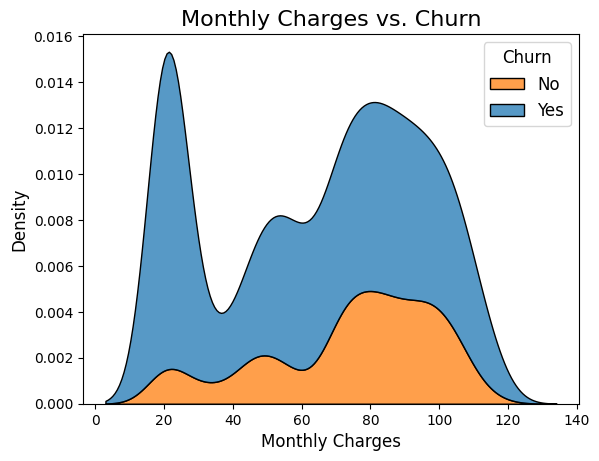

In [19]:
sns.kdeplot(data=df, x="MonthlyCharges",hue="Churn",multiple="stack")

# Customize the plot appearance
plt.title("Monthly Charges vs. Churn", fontsize=16)
plt.xlabel("Monthly Charges", fontsize=12)
plt.ylabel("Density", fontsize=12)

# Show the legend with custom labels
plt.legend(title="Churn", fontsize=12, title_fontsize=12, labels=["No", "Yes"])


**Observation:**
    
- it's noticeable that as monthly charges increase within the range of 60 to 120, the density also rises. This trend indicates a higher rate of churn as monthly charges increase.

In [26]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] 

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [27]:
print(df['TotalCharges'].dtype)

float64


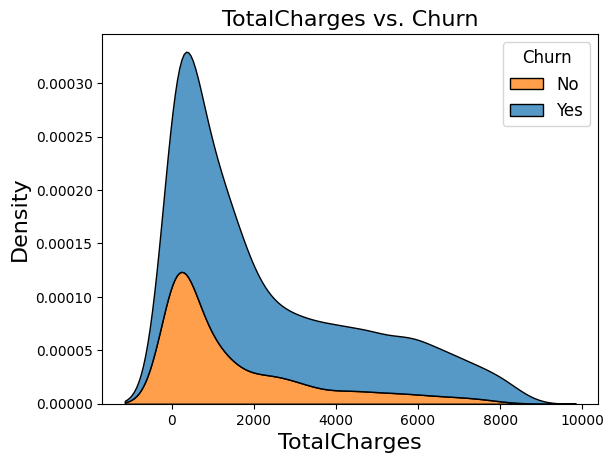

In [30]:
sns.kdeplot(data=df, x="TotalCharges",hue="Churn",multiple="stack")

# Customize the plot appearance
plt.title("TotalCharges vs. Churn", fontsize=16)
plt.xlabel("TotalCharges", fontsize=16)
plt.ylabel("Density", fontsize=16)

# Show the legend with custom labels
plt.legend(title="Churn", fontsize=12, title_fontsize=12, labels=["No", "Yes"])

- TotalCharges - the total amount that the client paid for the services for the entire time

**Observation**

- High churn rates are associated with lower total charges, with the highest churning occurring in the 0-2000 total charges range.

#### 3. What is the connection between gender, partner status, and churn?

<Axes: >

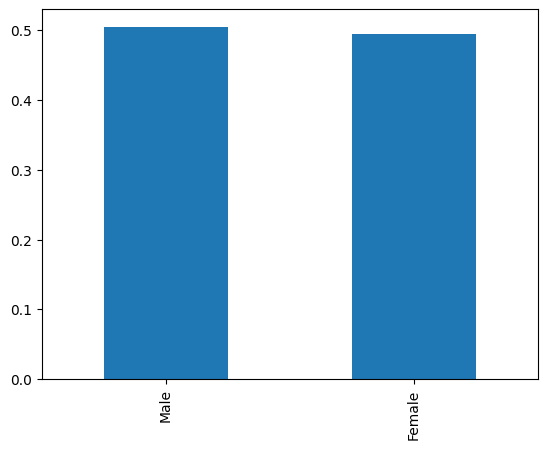

In [37]:
df.gender.value_counts(normalize=True).plot(kind='bar')

customerID  SeniorCitizen  Partner  Dependents  tenure  \
gender Churn                                                           
Female No           2549           2549     2549        2549    2549   
       Yes           939            939      939         939     939   
Male   No           2625           2625     2625        2625    2625   
       Yes           930            930      930         930     930   

              PhoneService  MultipleLines  InternetService  OnlineSecurity  \
gender Churn                                                                 
Female No             2549           2549             2549            2549   
       Yes             939            939              939             939   
Male   No             2625           2625             2625            2625   
       Yes             930            930              930             930   

              OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
gender Churn                                                             
Female No             2549              2549         2549         2549   
       Yes             939               939          939          939   
Male   No             2625              2625         2625         2625   
       Yes             930               930          930          930   

              StreamingMovies  Contract  PaperlessBilling  PaymentMethod  \
gender Churn                                                               
Female No                2549      2549              2549           2549   
       Yes                939       939               939            939   
Male   No                2625      2625              2625           2625   
       Yes                930       930               930            930   

              MonthlyCharges  TotalCharges  
gender Churn                                
Female No               2549          2544  
       Yes               939           939  
Male   No               2625          2619  
       Yes               930           930

In [38]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

4. Does the availability of technical support play a role in influencing customer churn?

5. Which aspect of the contract has the most significant impact on the business?

6. How does the quality of service differ for customers who have opted for streaming services?

7. Given that the dataset pertains to the telecom industry, what insights can we uncover regarding phone and internet services?